In [1]:
# install dependencies
%pip install -q \
  matplotlib \
  pandas \
  pycaret \
  'pycaret[analysis]' \
  seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
# global parameters
DATA_DIR = '../datasets/swell/final/'
TEST_DATA_NAME = 'test'
DO_SAVE_RESULTS = True
DO_COMPARE_MODELS = True
DO_PLOT_DATA = True

In [2]:
# set up the environment for the notebook
import os
os.environ['PYCARET_CUSTOM_LOGGING_LEVEL'] = 'CRITICAL'

import pandas as pd
pd.set_option('display.max_columns', 128)

In [15]:
# prepare the data
from pathlib import Path
from pycaret.datasets import get_data
from zipfile import ZipFile

DATA = {
  name: None
  for name in ['train', TEST_DATA_NAME]
}

for data_name in DATA.keys():
  data_path = DATA_DIR + data_name
  # extract the compressed data files
  if Path(f'{data_path}.csv').exists():
    print(f'Data file "{data_name}" was already extracted')
  else:
    ZipFile(f'{data_path}.zip', 'r').extract(
      f'{data_path}.csv', '..'
    )
    print(f'Data file "{data_name}" has been extracted successfully')
  # load the data
  print(f'Loading data file "{data_name}"')
  DATA[data_name] = get_data(dataset=f'{data_path}')

Data file "train" was already extracted
Loading data file "train"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


Data file "test" was already extracted
Loading data file "test"


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [5]:
# set column specifications
TARGET_NAME = 'condition'
IGNORE_NAMES = ['datasetId']

In [6]:
# establish an experiment
from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()
exp.setup(
  data=DATA['train'],
  test_data=DATA[TEST_DATA_NAME],
  target=TARGET_NAME,
  ignore_features=IGNORE_NAMES,
  index=False,
  session_id=123,
  remove_multicollinearity=True,
  multicollinearity_threshold=0.999,
)
exp.dataset_transformed.head(5)

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Multiclass
3,Target mapping,"interruption: 0, no stress: 1, time pressure: 2"
4,Original data shape,"(410322, 36)"
5,Transformed data shape,"(410322, 29)"
6,Transformed train set shape,"(369289, 29)"
7,Transformed test set shape,"(41033, 29)"
8,Ignore features,1
9,Numeric features,34


,MEAN_RR,MEDIAN_RR,RMSSD,SDRR_RMSSD,HR,pNN25,pNN50,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157837,853.763733,15.554504,9.063146,69.499954,11.133333,0.533333,199.061783,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,2.143342,2661.894043,72.203285,1009.249390,27.375666,98.485260,15.522602,0.421047,1.514737,3686.666260,65.018051,0.015380,2.139754,1.163485,1
1,939.425354,948.357849,12.964439,6.272368,64.363152,5.600000,0.000000,114.634460,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,2.930855,2314.265381,76.975731,690.113281,22.954140,99.695396,2.108526,0.070133,0.304603,3006.487305,327.296631,0.003055,2.174499,1.084711,0
2,898.186035,907.006836,16.305279,5.182201,67.450066,13.066667,0.200000,118.939255,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,2.127053,1373.887085,51.152225,1298.222656,48.335102,98.950470,13.769730,0.512671,1.049528,2685.879395,94.280907,0.010607,2.135350,1.176315,0
3,881.757874,893.460022,15.720469,5.748590,68.809563,11.800000,0.133333,127.318596,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,2.050988,2410.357422,70.180305,1005.981689,29.290304,98.224709,18.181913,0.529387,1.775294,3434.520996,55.328701,0.018074,2.178341,1.179688,1
4,809.625305,811.184875,19.213820,3.266724,74.565727,20.200001,0.200000,87.718277,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,1.816544,1151.177368,43.918365,1421.782104,54.242161,96.720009,48.215824,1.839473,3.279993,2621.175293,29.487873,0.033912,2.221121,1.249612,1


In [7]:
('Removed columns: ', list(
  set(IGNORE_NAMES) |
  (set(exp.dataset.columns) - set(exp.dataset_transformed.columns))
))

('Removed columns: ',
 ['RMSSD_REL_RR',
  'KURT_REL_RR',
  'SDRR',
  'datasetId',
  'SKEW_REL_RR',
  'SD1',
  'SDSD'])

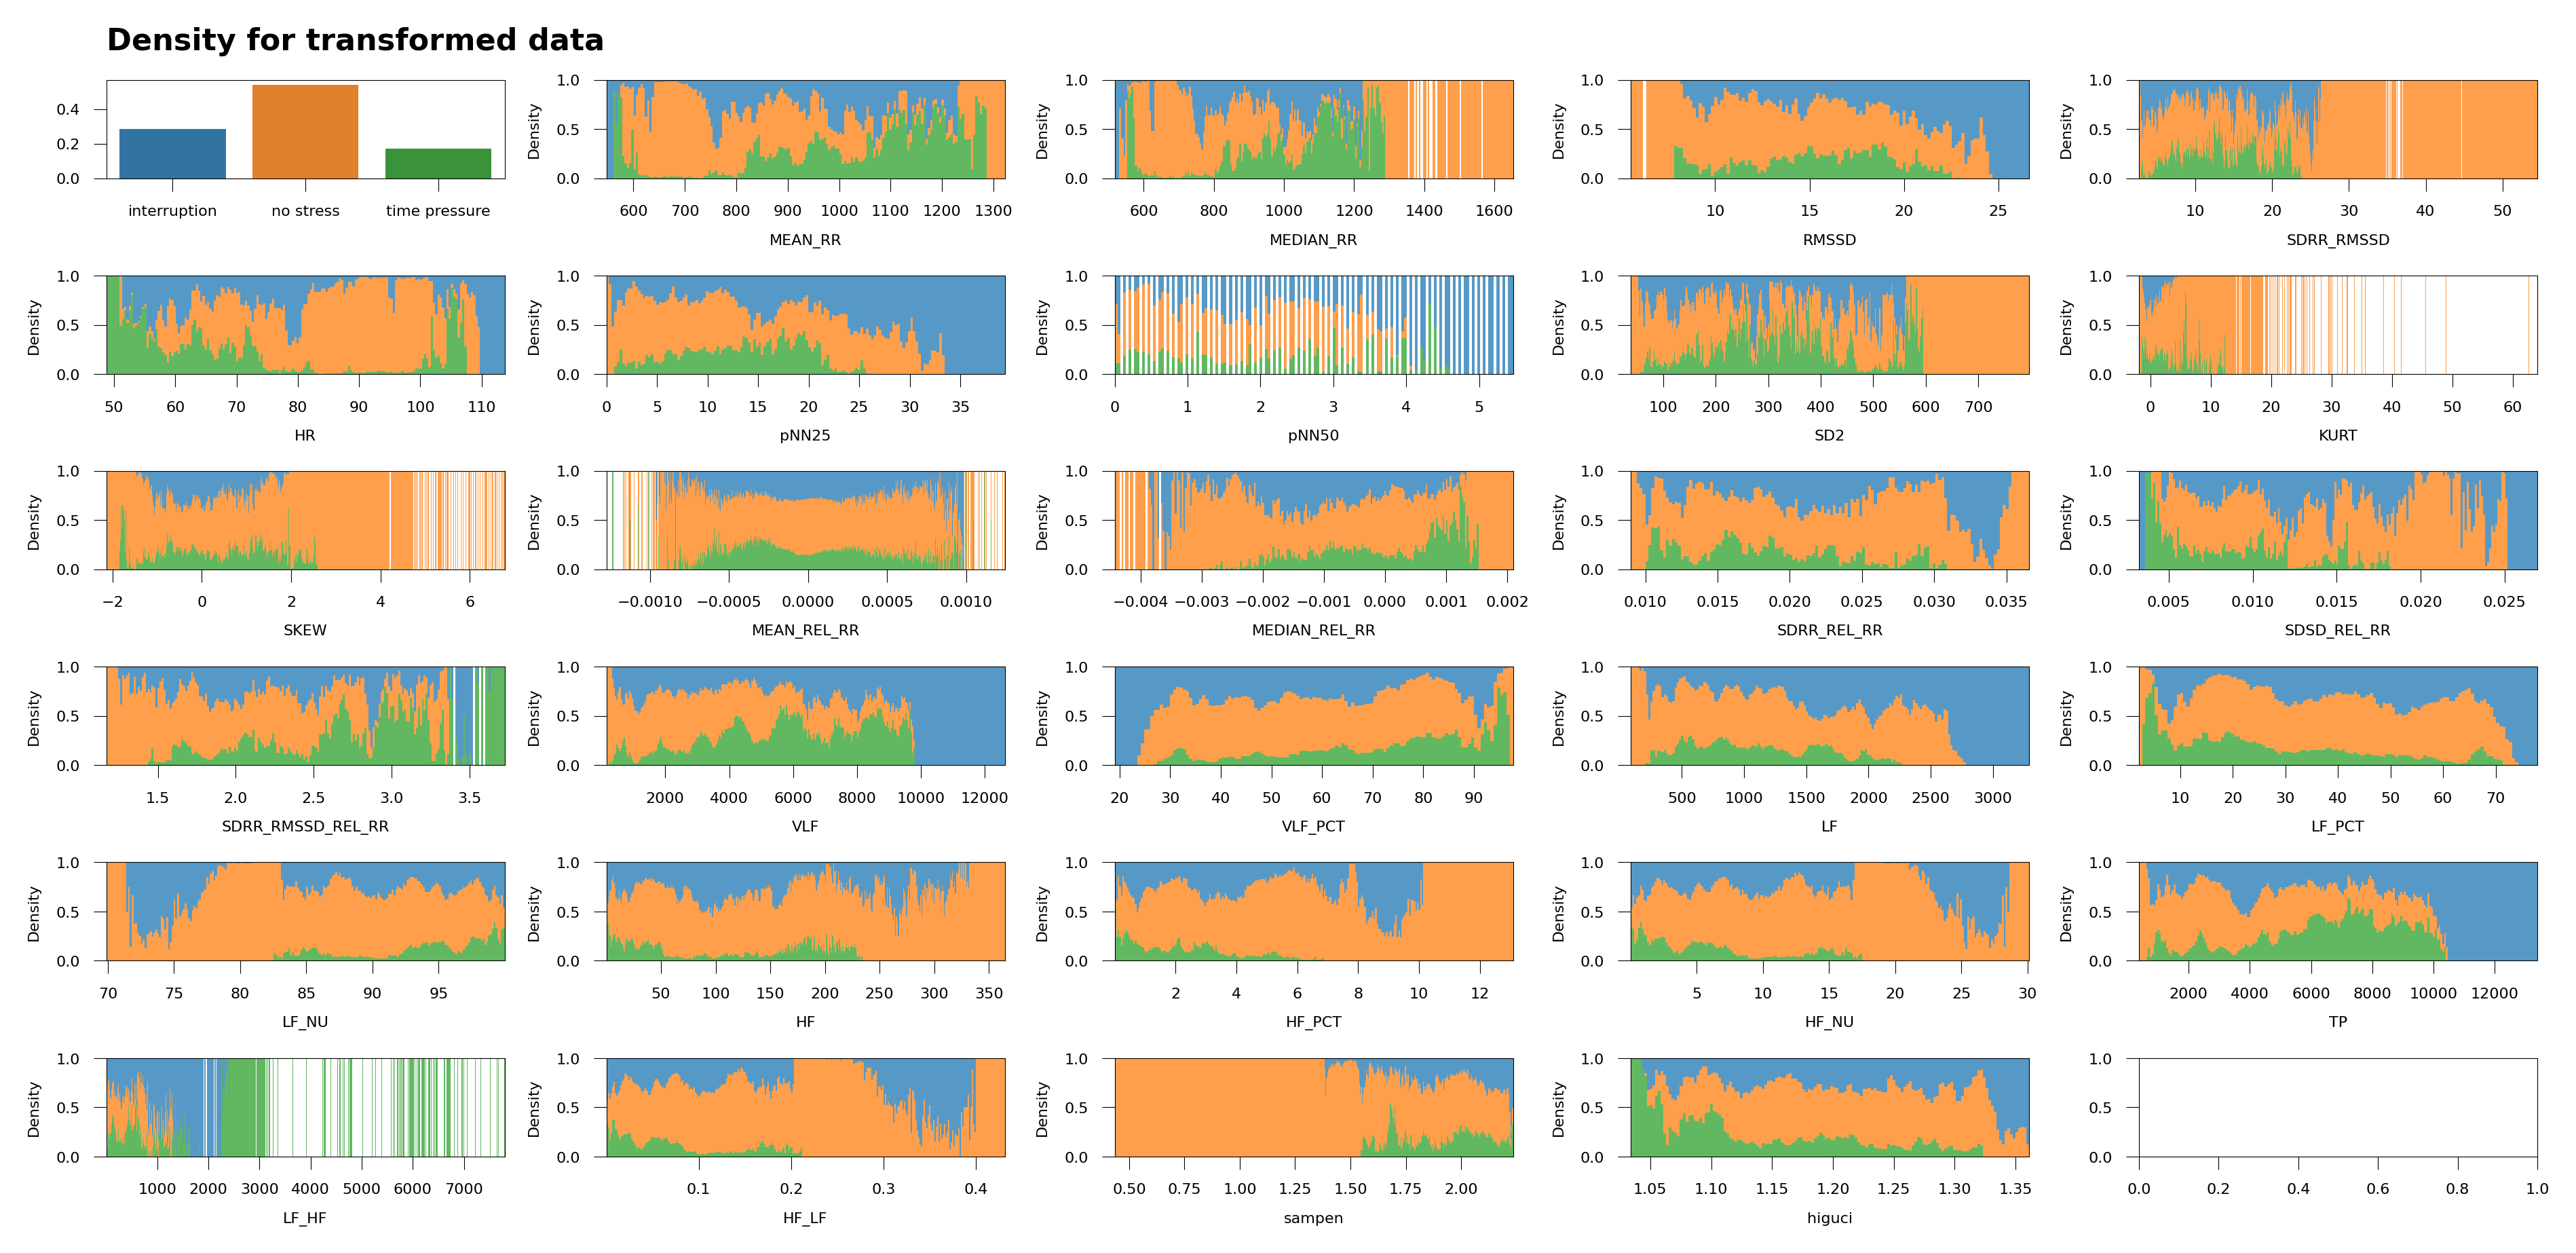

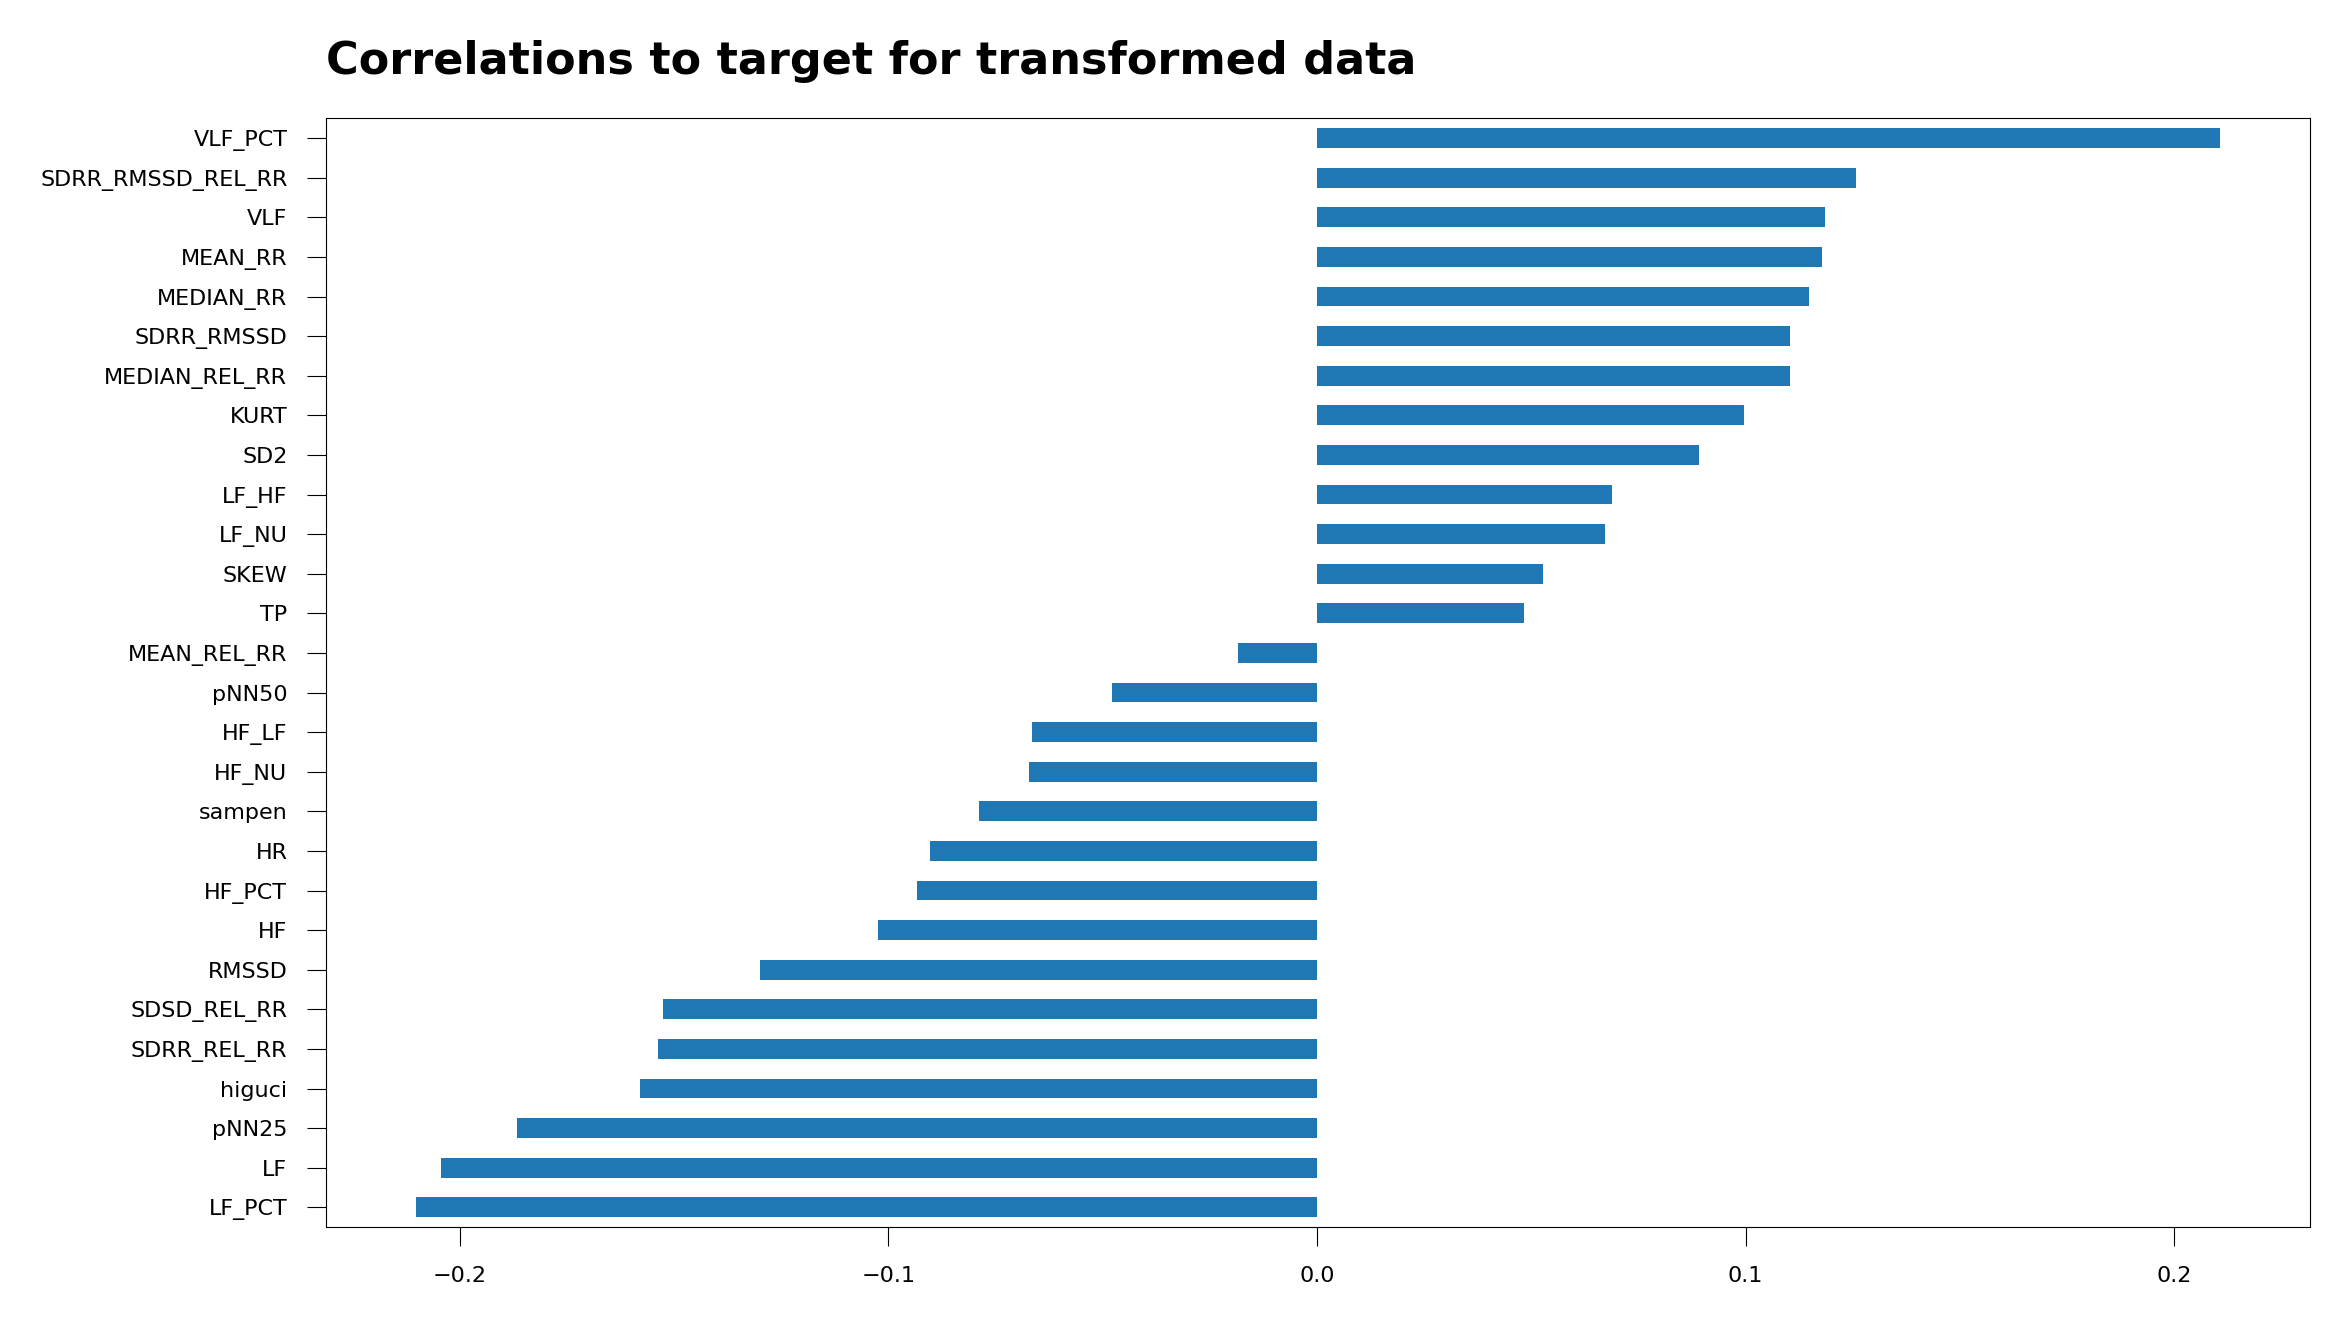

In [8]:
# show the distributions of the data

# DO_PLOT_DATA = True
if DO_PLOT_DATA:
  # set plot parameters
  from pathlib import Path
  import matplotlib.pyplot as plt
  import seaborn as sns

  # reset old global plot parameters
  plt.rcdefaults()

  # adjustable global plot parameters
  COLORMAP = sns.color_palette()
  DPI = 400
  OUTLINE_WIDTH = 0.2
  plt.rcParams['axes.grid'] = False
  plt.rcParams['axes.linewidth'] = OUTLINE_WIDTH
  plt.rcParams['figure.dpi'] = DPI
  plt.rcParams['font.size'] = 4
  plt.rcParams['xtick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['xtick.minor.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.major.width'] = OUTLINE_WIDTH
  plt.rcParams['ytick.minor.width'] = OUTLINE_WIDTH
  plot_dir = Path(f'../images/{TEST_DATA_NAME}')
  plot_dir.mkdir(parents=True, exist_ok=True)

  from math import ceil

  # adjustable local plot parameters
  TITLE = 'Density for transformed data'
  SUBPLOT_SIZE = (750, 300)

  # setting local plot parameters
  plots_per_col = 5
  shape = (plots_per_col, ceil(exp.dataset_transformed.shape[1] / plots_per_col))
  figsize = tuple(pxs[0] * pxs[1] / DPI for pxs in zip(SUBPLOT_SIZE, shape))
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot grid
  axs = plt.subplots(
    nrows=shape[1],
    ncols=shape[0],
    layout='constrained',
    figsize=figsize,
  )[1].flat

  # plot target distribution
  target_dist_data = exp.y.value_counts(normalize=True)
  ax = sns.barplot(
    x=target_dist_data.index,
    y=target_dist_data.values,
    ax=axs[0],
    palette=COLORMAP,
  )

  # plot data title
  axs[0].set_title(**title_params)

  # plot features distribution
  for x, ax in zip(exp.X_transformed.columns, axs[1:]):
    sns.histplot(
      data=exp.dataset_transformed,
      x=x,
      ax=ax,
      hue=TARGET_NAME,
      legend=False,
      linewidth=0,
      multiple='fill',
      palette=COLORMAP,
      stat='density',
    )

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show()

  # check correlation between target and features
  # adjustable plot parameters
  TITLE = 'Correlations to target for transformed data'
  PLOT_SIZE = (2560, 1440)

  # setting plot parameters
  figsize = tuple(px / DPI for px in PLOT_SIZE)
  title_params = {
    'label': TITLE,
    'fontdict': {
      'fontsize': plt.rcParams['font.size'] * 2,
      'fontweight': 'bold',
    },
    'loc': 'left',
    'pad': plt.rcParams['font.size'] * 2,
  }

  # plot correlation to target
  target_corr_data = (exp.dataset_transformed
    .corr()[TARGET_NAME]
    .drop(TARGET_NAME)
    .sort_values())
  ax = target_corr_data.plot.barh(figsize=figsize)
  ax.set_title(**title_params)

  # save the plot
  plt.savefig(
    fname=plot_dir.joinpath(f'{TITLE}.png'),
    bbox_inches='tight',
  )
  plt.show()

  # reset plot parameters
  plt.rcdefaults()

In [9]:
# compare models with AUROC

# DO_COMPARE_MODELS = True
if DO_COMPARE_MODELS:
  exp.compare_models(
    exclude=[ # excludes slow and unsuitable models
      'ada',
      'catboost',
      'gbc',
      'knn',
      'lr',
      'ridge',
      'rf',
      'svm',
    ],
    sort='auc',
    cross_validation=False,
  )
  None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.2000
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.3100
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.0400
dt,Decision Tree Classifier,0.9997,0.9997,0.9997,0.9997,0.9997,0.9994,0.9994,15.4000
qda,Quadratic Discriminant Analysis,0.6271,0.8479,0.6271,0.7081,0.6277,0.4415,0.4707,1.8200
lda,Linear Discriminant Analysis,0.6255,0.7425,0.6255,0.6113,0.5972,0.3084,0.3273,2.4500
nb,Naive Bayes,0.5411,0.6898,0.5411,0.5587,0.5415,0.2505,0.2544,1.5000
dummy,Dummy Classifier,0.5400,0.0000,0.5400,0.2916,0.3787,0.0000,0.0000,1.3400


In [10]:
# assign the best model id manually
BEST_MODEL_ID = 'xgboost'

best_model = exp.create_model(
  estimator=BEST_MODEL_ID,
  cross_validation=False,
)
best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

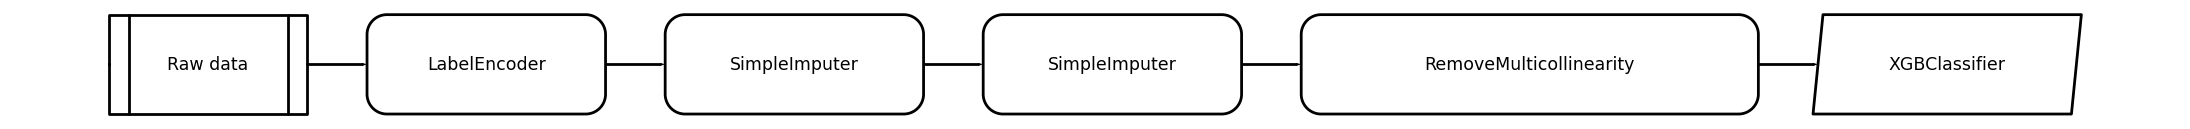

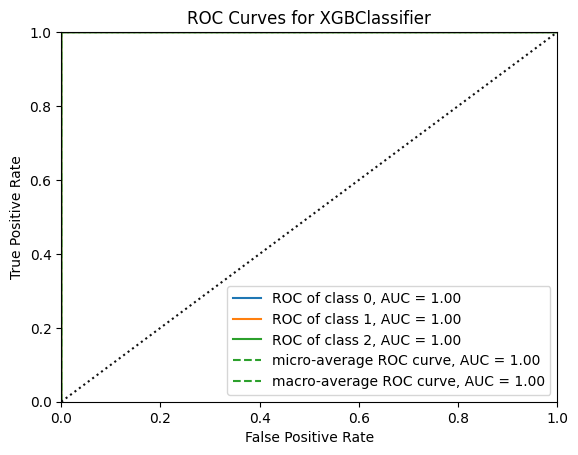

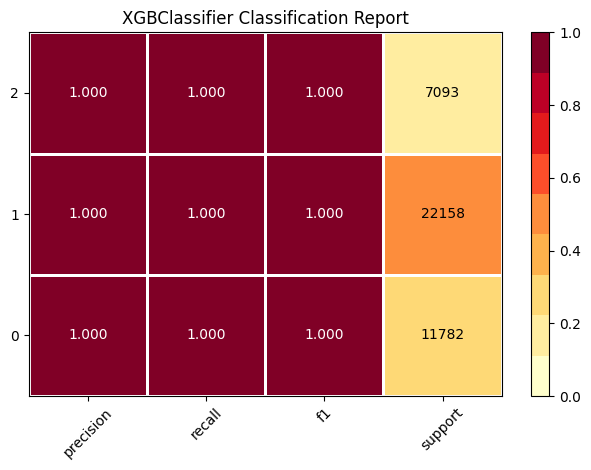

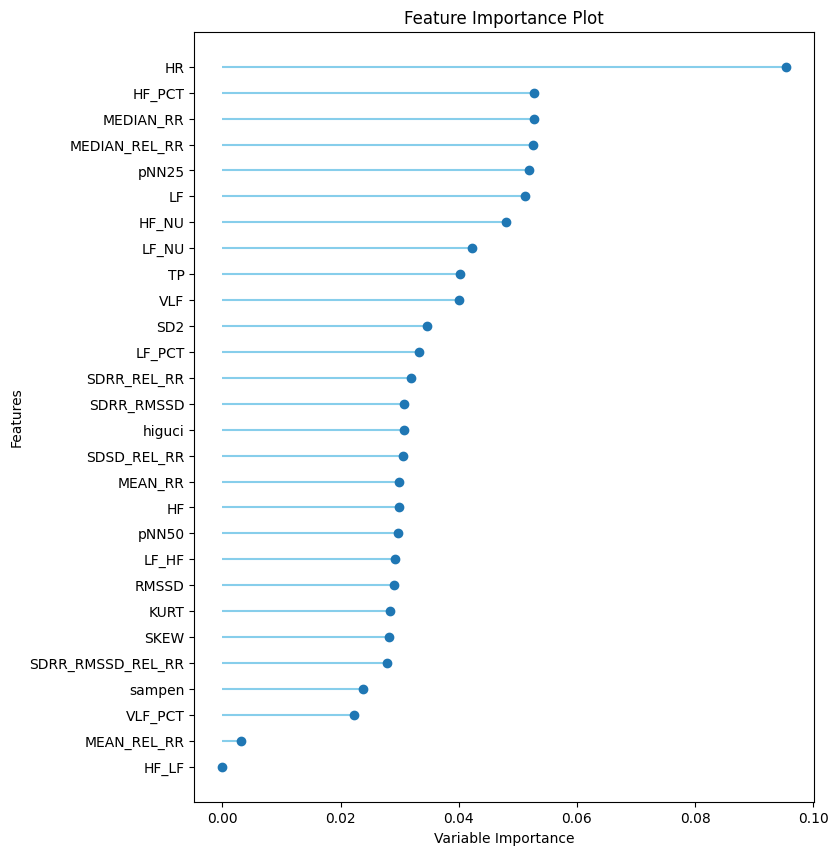

,Parameters
objective,multi:softprob
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,cpu
early_stopping_rounds,None
enable_categorical,False


In [11]:
plot_types = [
  'pipeline',
  'auc',
  'class_report',
  'feature_all',
  'parameter',
]
for plot_type in plot_types:
  exp.plot_model(
    estimator=best_model,
    plot=plot_type,
  )

In [12]:
# show hold-out predictions
predictions = exp.predict_model(
  estimator=best_model,
  raw_score=True,
)
display(predictions[filter(
  lambda name: name.startswith('prediction_'),
  predictions.columns,
)].sample(
  n=15,
  random_state=123,
))
predictions = None

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,prediction_label,prediction_score_interruption,prediction_score_no stress,prediction_score_time pressure
380118,interruption,0.9997,0.0003,0.0000
369536,no stress,0.0002,0.9997,0.0001
399645,no stress,0.0001,0.9999,0.0000
375878,no stress,0.0009,0.9987,0.0004
385576,no stress,0.0001,0.9999,0.0000
402199,time pressure,0.0001,0.0000,0.9999
391050,interruption,0.9996,0.0004,0.0000
397656,no stress,0.0004,0.9982,0.0013
398352,no stress,0.0002,0.9994,0.0004
398153,no stress,0.0025,0.9968,0.0007


In [13]:
# save the experiment and model

# DO_SAVE_RESULTS = True
if DO_SAVE_RESULTS:
  from pathlib import Path

  result_dir = Path(f'../models/{TEST_DATA_NAME}')
  result_dir.mkdir(
    parents=True,
    exist_ok=True,
  )
  exp.save_experiment(
    path_or_file=result_dir.joinpath('experiment.pkl'),
  )
  exp.save_model(
    model=best_model,
    model_name=result_dir.joinpath('model'),
  )

Transformation Pipeline and Model Successfully Saved
